<a href="https://colab.research.google.com/github/aarjunsrinivasan/ENPM-808Y-Neural-Networks/blob/master/cifarresnetcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_val=x_train[45000:,:,:,:]
y_val=y_train[45000:]
x_train=x_train[:45000,:,:,:]
y_train=y_train[:45000]
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).shuffle(10000)
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
train_dataset = train_dataset.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
train_dataset = train_dataset.repeat()
valid_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(5000).shuffle(10000)
valid_dataset = valid_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
test_dataset=tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(5000).shuffle(10000)
test_dataset = test_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

def res_net_block(input_data, filters, conv_size):
      x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
      x = layers.BatchNormalization(momentum=0.9)(x)
      x = layers.Dropout(0.1)(x)
      x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
      x = layers.BatchNormalization(momentum=0.9)(x)
      x = layers.Dropout(0.1)(x)
      x = layers.Add()([x, input_data])
      x = layers.Activation('relu')(x)
      return x


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.MaxPooling2D(3)(x)
num_res_net_blocks = 20
for i in range(num_res_net_blocks):
    x = res_net_block(x, 64, 3)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization(momentum=0.9)(x)
outputs = layers.Dense(10, activation='softmax')(x)

In [0]:
import os
checkpoint_path = "training_cifar10_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [0]:
with tf.device('/device:GPU:0'):
      res_net_model = tf.keras.Model(inputs, outputs)
      res_net_model.compile(optimizer=keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

In [0]:
hist=res_net_model.fit(train_dataset, epochs=100, steps_per_epoch=200,
              validation_data=valid_dataset, callbacks=cp_callback)

Epoch 1/100
199/200 [============================>.] - ETA: 0s - loss: 1.6931 - acc: 0.3701
Epoch 00001: saving model to training_cifar10_2/cp.ckpt
200/200 [==============================] - 8s 40ms/step - loss: 1.6910 - acc: 0.3713 - val_loss: 1.4445 - val_acc: 0.4648
Epoch 2/100
199/200 [============================>.] - ETA: 0s - loss: 1.3079 - acc: 0.5221
Epoch 00002: saving model to training_cifar10_2/cp.ckpt
200/200 [==============================] - 7s 35ms/step - loss: 1.3074 - acc: 0.5227 - val_loss: 1.5105 - val_acc: 0.4908
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 1.1347 - acc: 0.5930
Epoch 00003: saving model to training_cifar10_2/cp.ckpt
200/200 [==============================] - 7s 36ms/step - loss: 1.1347 - acc: 0.5930 - val_loss: 1.0967 - val_acc: 0.6108
Epoch 4/100
199/200 [============================>.] - ETA: 0s - loss: 1.0099 - acc: 0.6437
Epoch 00004: saving model to training_cifar10_2/cp.ckpt
200/200 [==============================] -

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


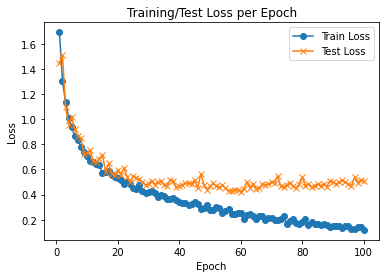

In [0]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Test Loss'], loc = 0)
ax.set_title('Training/Test Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 
# plt.plot()
plt.show()

In [0]:
res_net_model.evaluate(test_dataset)


2/2 [==============================] - 0s 144ms/step - loss: 0.5332 - acc: 0.8628


[0.533187747001648, 0.8628000020980835]